## Database

### 1. Give the definitions of "primary key", "composite key", "foreign key", "superkey", "candidate key".




1. Primary Key: A Primary Key is the table column with values that uniquely/distinctively identify each row in a table.

2. Composite Key: A Composite Key represents two or more table columns that uniquely identify a row in that table.

3. Foreign Key: A Foreign Key is a column or columns of values in one table that refers to the unique data values, or the primary key, in another table.

4. Superkey: A super key is a set of one or more columns, which can uniquely identify a row in a table. 

5. Candidate Key: A candidate key is a column in a table that can identify each unique record independently of other data. They are selected from the set of super keys, such that the candidate keys don't have any redundant columns. They're also called minimal super key.

### 2. Let's say our student database looks like this:
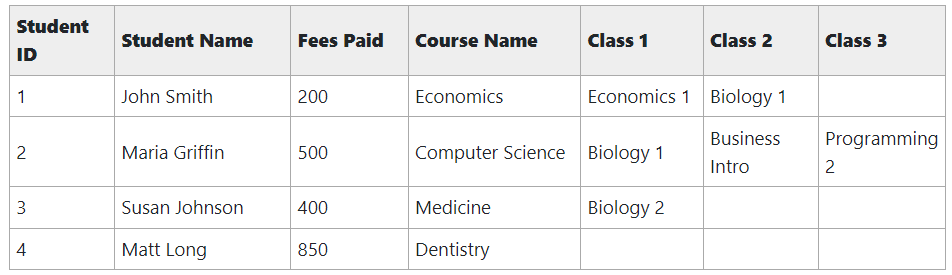

This table keeps track of a few pieces of information:

* The student names
* The fees a student has paid
* The classes a student is taking, if any

This is not a normalized table, and there are a few issues with this.

* (1) What is insert anomaly? Does this database have insert anomaly?



An insert anomaly is an issue that occurs when data cannot be inserted because of an incomplete primary key.

There is more than one entity in this table.

Yes, this database has an insert anomaly because, for example, we can't add a student to our database unless they enroll in a course or we can't add a course unless one student enrolls in it. This means that inserting data about one entity requires inserting data about another even if that latter information is not needed.

* (2) What is update anomaly? Does this database have update anomaly?




An update anomaly is an issue that occurs when a subset of duplicate data is updated and that leads to inconsistent data. This is generally caused due to redundant data. 

There is more than one entity in this table.

Yes, this database has an update anomaly because, for example, if a course name changes, we would need to update the course name in multiple rows for each student enrolled in that course. Failure to update all instances could lead to inconsistencies in the database.

* (3) What is delete anomaly? Does this database have delete anomaly?

A delete anomaly is an issue that occurs when the deletion of data about one entity in a row causes a part of the composite primary key for that row to be null.

There is more than one entity in this table.

Yes, this database has a delete anomaly because, for example, if a student is the last student in a course, that student can't be removed without removing the course too, or, if a course was canceled, and a particular student is only enrolled in that course, then we will no longer have that student's data in our table.

### 3. A single table is called "student" with a lot of columns and this is how it currently looks.

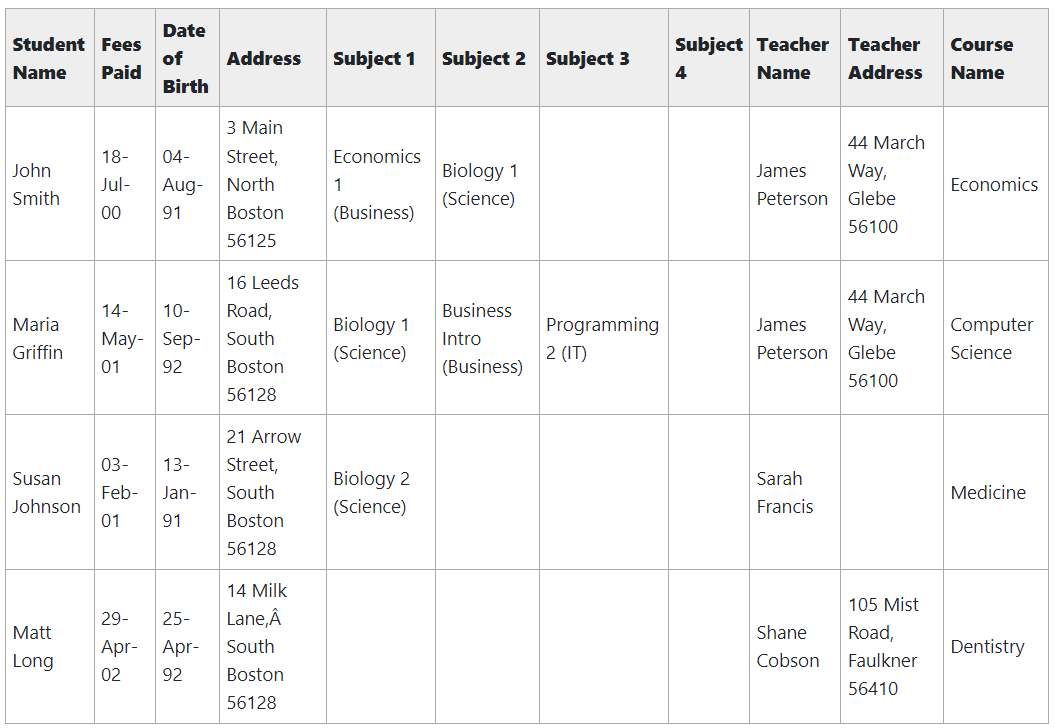



**Extra Information:**

* Every student must choose one course, but he/she can choose 0, 1, or multiple subjects.
* Each student has one teacher as his/her advisor. But one teacher can have multiple students as advisee.


1) Please use SQLite3 create a new database "student.db" with one single table "student" based on the above information.

In [69]:
import sqlite3
conn = sqlite3.connect('student.db')
conn.execute('''
CREATE TABLE student(
    Student_ID  INTEGER PRIMARY KEY AUTOINCREMENT,
    Student_Name TEXT,
    Fees_Paid TEXT,
    Date_of_Birth TEXT,
    Address TEXT,
    Subject_1 TEXT,
    Subject_2 TEXT,
    Subject_3 TEXT,
    Subject_4 TEXT,
    Teacher_Name TEXT,
    Teacher_Address TEXT,
    Course_Name TEXT
);
''') 
conn.commit()

In [70]:
conn.execute('''
INSERT INTO student(Student_Name, Fees_Paid, Date_of_Birth, Address, Subject_1, Subject_2, Subject_3, Subject_4, Teacher_Name, Teacher_Address, Course_Name)
VALUES
    ('John Smith', '18-Jul-00', '04-Aug-91', '3 Main Street, North Boston 56125', 'Economics 1 (Business)', 'Biology 1 (Science)', '', '', 'James Peterson', '44 March Way, Glebe 56100', 'Economics'),
    ('Maria Griffin', '14-May-01', '10-Sep-92', '16 Leeds Road, South Boston 56128', 'Biology 1 (Science)', 'Business Intro (Business)', 'Programming 2 (IT)', '', 'James Peterson', '44 March Way, Glebe 56100', 'Computer Science'),
    ('Susan Johnson', '03-Feb-01', '13-Jan-91', '21 Arrow Street, South Boston 56128', 'Biology 2 (Science)', '', '', '', 'Sarah Francis', '', 'Medicine'),
    ('Matt Long', '29-Apr-02', '25-Apr-92', '14 Milk Lane, South Boston 56128', '', '', '', '', 'Shane Cobson', '105 Mist Road, Faulkner 56410', 'Dentistry');
''') 
conn.commit()

In [71]:
cursor = conn.execute('SELECT * FROM student;')
for r in cursor:
    print(r)

(1, 'John Smith', '18-Jul-00', '04-Aug-91', '3 Main Street, North Boston 56125', 'Economics 1 (Business)', 'Biology 1 (Science)', '', '', 'James Peterson', '44 March Way, Glebe 56100', 'Economics')
(2, 'Maria Griffin', '14-May-01', '10-Sep-92', '16 Leeds Road, South Boston 56128', 'Biology 1 (Science)', 'Business Intro (Business)', 'Programming 2 (IT)', '', 'James Peterson', '44 March Way, Glebe 56100', 'Computer Science')
(3, 'Susan Johnson', '03-Feb-01', '13-Jan-91', '21 Arrow Street, South Boston 56128', 'Biology 2 (Science)', '', '', '', 'Sarah Francis', '', 'Medicine')
(4, 'Matt Long', '29-Apr-02', '25-Apr-92', '14 Milk Lane, South Boston 56128', '', '', '', '', 'Shane Cobson', '105 Mist Road, Faulkner 56410', 'Dentistry')


In [72]:
def execSQLquery(query, conn):
    conn.execute(query)
    conn.commit()

In [73]:
def readallrows(query, conn):
    cursor = conn.execute(query)
    for r in cursor:
        print(r)

2) Please normalize this table to 4th normal form.

For each table, indicate the **primary key** and **foreign key if any**. Write down the **constraint**.

Print all the new tables and save all the new tables in the same database.

In [92]:
execSQLquery('CREATE TABLE students AS SELECT DISTINCT Student_ID, Student_Name, Fees_Paid, Date_of_Birth, Address FROM student;', conn)

In [94]:
readallrows('SELECT * FROM students;', conn)

(1, 'John Smith', '18-Jul-00', '04-Aug-91', '3 Main Street, North Boston 56125')
(2, 'Maria Griffin', '14-May-01', '10-Sep-92', '16 Leeds Road, South Boston 56128')
(3, 'Susan Johnson', '03-Feb-01', '13-Jan-91', '21 Arrow Street, South Boston 56128')
(4, 'Matt Long', '29-Apr-02', '25-Apr-92', '14 Milk Lane, South Boston 56128')


Table 1: subjects

Primary Key: Subject_ID

In [52]:
execSQLquery('CREATE TABLE subjects (Subject_ID INTEGER PRIMARY KEY AUTOINCREMENT, Subject_Name TEXT);', conn)

In [53]:
execSQLquery('''INSERT INTO subjects (Subject_Name)
SELECT DISTINCT Subject_1 AS Subject_Name FROM student WHERE Subject_Name <> '' UNION SELECT DISTINCT Subject_2 AS Subject_Name FROM student WHERE Subject_Name <> '' UNION SELECT DISTINCT Subject_3 AS Subject_Name
FROM student WHERE Subject_Name <> '' UNION SELECT DISTINCT Subject_4 AS Subject_Name
FROM student WHERE Subject_Name <> '';''', conn)

In [54]:
readallrows('SELECT * FROM subjects;', conn)

(1, 'Biology 1 (Science)')
(2, 'Biology 2 (Science)')
(3, 'Business Intro (Business)')
(4, 'Economics 1 (Business)')
(5, 'Programming 2 (IT)')


Table 2: teacher

Primary Key: Teacher_ID

In [87]:
execSQLquery('CREATE TABLE teacher (Teacher_ID INTEGER PRIMARY KEY AUTOINCREMENT, Teacher_Name TEXT, Teacher_Address TEXT);', conn)

In [88]:
execSQLquery('INSERT INTO teacher (Teacher_Name, Teacher_Address) SELECT DISTINCT Teacher_Name, Teacher_Address FROM student;', conn)

In [89]:
readallrows('SELECT * FROM teacher;', conn)

(1, 'James Peterson', '44 March Way, Glebe 56100')
(2, 'Sarah Francis', '')
(3, 'Shane Cobson', '105 Mist Road, Faulkner 56410')


Table 3: courses

Primary Key: Course_ID

In [101]:
execSQLquery('CREATE TABLE courses (Course_ID INTEGER PRIMARY KEY AUTOINCREMENT, Course_Name TEXT);', conn)

In [102]:
execSQLquery('INSERT INTO courses (Course_Name) SELECT DISTINCT Course_Name FROM student;', conn)

In [103]:
readallrows('SELECT * FROM courses;', conn)

(1, 'Economics')
(2, 'Computer Science')
(3, 'Medicine')
(4, 'Dentistry')


Temp table to create final 'students' table

In [112]:
execSQLquery('CREATE TABLE temp AS SELECT * FROM students;', conn)

In [119]:
execSQLquery('DROP TABLE students;', conn)

Table 4: students

Primary Key: Student_ID
Foreign Keys: Course_ID, Teacher_ID

In [120]:
execSQLquery('''CREATE TABLE students (
    Student_ID INTEGER PRIMARY KEY,
    Student_Name TEXT,
    Fees_Paid TEXT,
    Date_of_Birth TEXT,
    Address TEXT,
    Course_ID INTEGER,
    Teacher_ID INTEGER,
    FOREIGN KEY (Course_ID) REFERENCES courses(Course_ID),
    FOREIGN KEY (Teacher_ID) REFERENCES teachers(Teacher_ID)
);''', conn)

In [121]:
execSQLquery('''INSERT INTO students (Student_ID, Course_ID, Teacher_ID, Student_Name, Fees_Paid, Date_of_Birth, Address)
SELECT temp.Student_ID, courses.Course_ID, teacher.Teacher_ID, temp.Student_Name, temp.Fees_Paid, temp.Date_of_Birth, temp.Address
FROM temp
JOIN student ON temp.Student_ID = student.Student_ID
JOIN courses ON student.Course_Name = courses.Course_Name
JOIN teacher ON student.Teacher_Name = teacher.Teacher_Name;
''', conn)

In [124]:
execSQLquery('DROP TABLE temp;', conn)

In [122]:
readallrows('SELECT * FROM students;', conn)

(1, 'John Smith', '18-Jul-00', '04-Aug-91', '3 Main Street, North Boston 56125', 1, 1)
(2, 'Maria Griffin', '14-May-01', '10-Sep-92', '16 Leeds Road, South Boston 56128', 2, 1)
(3, 'Susan Johnson', '03-Feb-01', '13-Jan-91', '21 Arrow Street, South Boston 56128', 3, 2)
(4, 'Matt Long', '29-Apr-02', '25-Apr-92', '14 Milk Lane, South Boston 56128', 4, 3)


Table 5: enrollments

Foreign Keys: Student_ID, Subject_ID

In [76]:
execSQLquery('''CREATE TABLE enrollments (
    Student_ID INTEGER,
    Subject_ID INTEGER,
    FOREIGN KEY (Student_ID) REFERENCES student(Student_ID),
    FOREIGN KEY (Subject_ID) REFERENCES subjects(Subject_ID)
);''', conn)

In [80]:
execSQLquery('''INSERT INTO enrollments (Student_ID, Subject_ID)
SELECT s.Student_ID, sub.Subject_ID
FROM students s
JOIN student stu ON s.Student_ID = stu.Student_ID
JOIN subjects sub ON (stu.Subject_1 = sub.Subject_Name OR stu.Subject_2 = sub.Subject_Name OR stu.Subject_3 = sub.Subject_Name OR stu.Subject_4 = sub.Subject_Name);''' ,conn)

In [81]:
readallrows('SELECT * FROM enrollments;', conn)

(1, 1)
(1, 4)
(2, 1)
(2, 3)
(2, 5)
(3, 2)


3) Write query to show all the names of tables/views in the database "student.db".\
For each table/view, write query to show all the names of attributes.

In [125]:
readallrows('''SELECT name FROM sqlite_master WHERE TYPE = 'table' OR TYPE = 'view';''', conn)

('sqlite_sequence',)
('subjects',)
('student',)
('enrollments',)
('teacher',)
('courses',)
('students',)


sqlite_sequence: This was auto-generated due to the use of the feature 'AUTOINCREMENT'.

In [127]:
readallrows('''SELECT name FROM PRAGMA_TABLE_INFO('sqlite_sequence');''', conn)

('name',)
('seq',)


student: original table given in question (with added Primary Key column Student_ID)

In [128]:
readallrows('''SELECT name FROM PRAGMA_TABLE_INFO('student');''', conn)

('Student_ID',)
('Student_Name',)
('Fees_Paid',)
('Date_of_Birth',)
('Address',)
('Subject_1',)
('Subject_2',)
('Subject_3',)
('Subject_4',)
('Teacher_Name',)
('Teacher_Address',)
('Course_Name',)


In [129]:
readallrows('''SELECT name FROM PRAGMA_TABLE_INFO('students');''', conn)

('Student_ID',)
('Student_Name',)
('Fees_Paid',)
('Date_of_Birth',)
('Address',)
('Course_ID',)
('Teacher_ID',)


In [130]:
readallrows('''SELECT name FROM PRAGMA_TABLE_INFO('subjects');''', conn)

('Subject_ID',)
('Subject_Name',)


In [131]:
readallrows('''SELECT name FROM PRAGMA_TABLE_INFO('teacher');''', conn)

('Teacher_ID',)
('Teacher_Name',)
('Teacher_Address',)


In [132]:
readallrows('''SELECT name FROM PRAGMA_TABLE_INFO('courses');''', conn)

('Course_ID',)
('Course_Name',)


In [133]:
readallrows('''SELECT name FROM PRAGMA_TABLE_INFO('enrollments');''', conn)

('Student_ID',)
('Subject_ID',)
